   weight  hwy_mpg
0    2548       27
1    2548       27
2    2823       26
3    2337       30
4    2824       22
Best-fit line parameters:
Slope: -0.010547157168719587
Intercept: 57.70517422574474


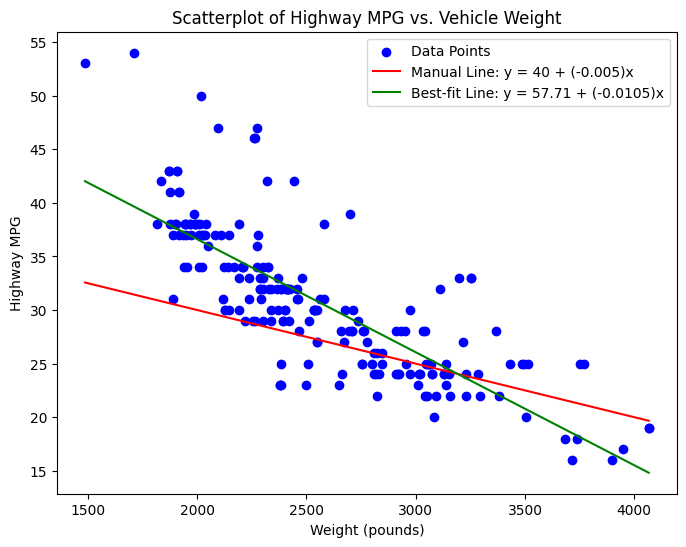

RMSE between manual line predictions and best-fit line predictions: 4.555846679752582
Predicted highway MPG for a car weighing 3200 pounds: 23.95427128584206


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset (ensure 'car data.csv' is in your working directory)
# We assume the CSV has two columns: 'weight' and 'highway_mpg'
data = pd.read_csv('car_data.csv')
print(data.head())

# ---------------------------
# 1. Create a scatterplot of highway MPG vs. weight
plt.figure(figsize=(8, 6))
plt.scatter(data['weight'], data['hwy_mpg'], color='blue', label='Data Points')
plt.xlabel('Weight (pounds)')
plt.ylabel('Highway MPG')
plt.title('Scatterplot of Highway MPG vs. Vehicle Weight')

# ---------------------------
# 5. Manually add a line to the graph
# Adjust the manual slope and intercept based on your visual inspection.
# For example, here we use:
manual_slope = -0.005   # Your guessed slope
manual_intercept = 40   # Your guessed y-intercept
# Compute y values for the manual line using the min and max weight values
x_vals = np.array([data['weight'].min(), data['weight'].max()])
y_manual = manual_intercept + manual_slope * x_vals
plt.plot(x_vals, y_manual, color='red', label=f'Manual Line: y = {manual_intercept} + ({manual_slope})x')

# ---------------------------
# 6. Use Scikit-learn to find the best-fit line
# Reshape the weight data into 2D array for scikit-learn
X = data['weight'].values.reshape(-1, 1)
y = data['hwy_mpg'].values

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Extract the best-fit slope and intercept
best_slope = model.coef_[0]
best_intercept = model.intercept_
print("Best-fit line parameters:")
print("Slope:", best_slope)
print("Intercept:", best_intercept)

# Plot the best-fit line
y_best = best_intercept + best_slope * x_vals
plt.plot(x_vals, y_best, color='green', 
         label=f'Best-fit Line: y = {best_intercept:.2f} + ({best_slope:.4f})x')

plt.legend()
plt.show()

# ---------------------------
# 7. Compute the RMSE between manual line predictions and best-fit predictions
# Compute predictions for every weight in the dataset for both lines
y_manual_pred = manual_intercept + manual_slope * data['weight']
y_best_pred = best_intercept + best_slope * data['weight']

# Calculate RMSE of the differences between the two sets of predictions
rmse = np.sqrt(mean_squared_error(y_best_pred, y_manual_pred))
print("RMSE between manual line predictions and best-fit line predictions:", rmse)

# ---------------------------
# 8. Predict the highway MPG for a car that weighs 3200 pounds using the best-fit model
weight_new = np.array([[3200]])
mpg_pred = model.predict(weight_new)
print("Predicted highway MPG for a car weighing 3200 pounds:", mpg_pred[0])
